In [2]:
import pandas as pd

In [43]:
df=pd.read_csv("C://Users//BijliBeyon//Downloads//VIT Downloads//j component//New folder//KARNATAKA DETAILED(POLITICIAN) MOD.csv")

In [45]:
df.columns

Index(['AC NO.', 'AC NAME', 'DISTRICT NAME', 'CANDIDATENAME', 'SEX', 'AGE',
       'CATEGORY', 'PARTY', 'SYMBOL', 'GENERAL', 'POSTAL', 'TOTAL',
       '% VOTES POLLED', 'TOTAL ELECTORS', 'LITERACY RATE ', 'RESULT'],
      dtype='object')

In [3]:
data=pd.read_csv(r"C://Users//BijliBeyon//Downloads//VIT Downloads//Project(SEM 3)//nlp data.csv",encoding='latin-1')


In [4]:
data

,TWEETS
0,#KarnatakaElections2023 Congress manifesto pro...
1,#KarnatakaElections2023 BJP manifesto promises...
2,#KarnatakaElections2023 JD(S) manifesto promis...
3,#KarnatakaElections2023 A three-way battle bet...
4,#KarnatakaElections2023 Exit polls predict a c...
...,...
904,24. Tweet 24: The #KarnatakaElections2023 are ...
905,25. Tweet 25: The #KarnatakaElections2023 are ...
906,26. Tweet 26: The #KarnatakaElections2023 are ...
907,27. Tweet 27: The #KarnatakaElections2023 are ...


In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Load the data
data = pd.read_csv(r"C://Users//BijliBeyon//Downloads//VIT Downloads//Project(SEM 3)//nlp data.csv", encoding='latin-1')

# Function to clean and preprocess tweets
def clean_text(text):
    # Remove special characters, URLs, and user mentions
    text = re.sub(r"http\S+|www\S+|https\S+|\@\w+|\#\w+", '', text, flags=re.MULTILINE)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^A-Za-z]+', ' ', text).lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply the cleaning function to the 'text' column
data['cleaned_text'] = data['TWEETS'].apply(clean_text)


In [18]:
pip install textblob

     ------------------------------------ 636.8/636.8 kB 164.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
data

,TWEETS,cleaned_text
0,#KarnatakaElections2023 Congress manifesto pro...,congress manifesto promises lakh jobs free ele...
1,#KarnatakaElections2023 BJP manifesto promises...,bjp manifesto promises double farmers income b...
2,#KarnatakaElections2023 JD(S) manifesto promis...,jd manifesto promises waive farmers loans prov...
3,#KarnatakaElections2023 A three-way battle bet...,three way battle congress bjp jd
4,#KarnatakaElections2023 Exit polls predict a c...,exit polls predict close contest congress bjp
...,...,...
904,24. Tweet 24: The #KarnatakaElections2023 are ...,tweet time people karnataka make difference
905,25. Tweet 25: The #KarnatakaElections2023 are ...,tweet time people karnataka shape destiny
906,26. Tweet 26: The #KarnatakaElections2023 are ...,tweet time people karnataka decide future
907,27. Tweet 27: The #KarnatakaElections2023 are ...,tweet time people karnataka make voices count


In [7]:
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the tweet
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'cleaned_text' column
data['sentiment'] = data['TWEETS'].apply(analyze_sentiment)


In [8]:
data

,TWEETS,cleaned_text,sentiment
0,#KarnatakaElections2023 Congress manifesto pro...,congress manifesto promises lakh jobs free ele...,Positive
1,#KarnatakaElections2023 BJP manifesto promises...,bjp manifesto promises double farmers income b...,Positive
2,#KarnatakaElections2023 JD(S) manifesto promis...,jd manifesto promises waive farmers loans prov...,Positive
3,#KarnatakaElections2023 A three-way battle bet...,three way battle congress bjp jd,Neutral
4,#KarnatakaElections2023 Exit polls predict a c...,exit polls predict close contest congress bjp,Neutral
...,...,...,...
904,24. Tweet 24: The #KarnatakaElections2023 are ...,tweet time people karnataka make difference,Neutral
905,25. Tweet 25: The #KarnatakaElections2023 are ...,tweet time people karnataka shape destiny,Neutral
906,26. Tweet 26: The #KarnatakaElections2023 are ...,tweet time people karnataka decide future,Neutral
907,27. Tweet 27: The #KarnatakaElections2023 are ...,tweet time people karnataka make voices count,Neutral


In [9]:
# List of parties
parties = ['jds','congress', 'bjp','nota']  # Replace with actual party names

# Function to calculate sentiment percentages for each party
def calculate_sentiment_percentage(party_name):
    party_tweets = data[data['cleaned_text'].str.contains(party_name, case=False)]
    total_tweets = len(party_tweets)
    positive_tweets = len(party_tweets[party_tweets['sentiment'] == 'Positive'])
    negative_tweets = len(party_tweets[party_tweets['sentiment'] == 'Negative'])
    if total_tweets > 0:
        positive_percentage = (positive_tweets / total_tweets) * 100
        negative_percentage = (negative_tweets / total_tweets) * 100
        print(f"Sentiment analysis for {party_name}:")
        print(f"Positive tweets: {positive_percentage:.2f}%")
        print(f"Negative tweets: {negative_percentage:.2f}%")
    else:
        print(f"No tweets found for {party_name}.")

# Calculate sentiment percentages for each party
for party in parties:
    calculate_sentiment_percentage(party)


Sentiment analysis for jds:
Positive tweets: 32.46%
Negative tweets: 22.81%
Sentiment analysis for congress:
Positive tweets: 48.22%
Negative tweets: 15.53%
Sentiment analysis for bjp:
Positive tweets: 40.12%
Negative tweets: 17.02%
No tweets found for nota.


In [10]:
# List of parties
parties = ['jds','congress', 'bjp','nota']  # Replace with actual party names

# Function to calculate sentiment percentages for each party
def calculate_sentiment_percentage(party_name):
    party_tweets = data[data['cleaned_text'].str.contains(party_name, case=False)]
    total_tweets = len(party_tweets)
    positive_tweets = len(party_tweets[party_tweets['sentiment'] == 'Positive'])
    negative_tweets = len(party_tweets[party_tweets['sentiment'] == 'Negative'])
    if total_tweets > 0:
        positive_percentage = (positive_tweets )
        negative_percentage = (negative_tweets)
        print(f"Sentiment analysis for {party_name}:")
        print(f"Positive tweets: {positive_percentage:.2f}")
        print(f"Negative tweets: {negative_percentage:.2f}")
    else:
        print(f"No tweets found for {party_name}.")

# Calculate sentiment percentages for each party
for party in parties:
    calculate_sentiment_percentage(party)


Sentiment analysis for jds:
Positive tweets: 37.00
Negative tweets: 26.00
Sentiment analysis for congress:
Positive tweets: 149.00
Negative tweets: 48.00
Sentiment analysis for bjp:
Positive tweets: 132.00
Negative tweets: 56.00
No tweets found for nota.


In [11]:
# List of parties
parties = ['jds','congress', 'bjp','nota']  # Replace with actual party names

# Function to classify tweets into parties or general
def classify_party(tweet):
    for party in parties:
        if party in tweet:
            return party
    return 'General'

# Apply the 'classify_party' function to create a new column 'party'
data['party'] = data['cleaned_text'].apply(classify_party)

# Function to calculate sentiment percentages for each party or general category
def calculate_sentiment_percentage(category):
    category_tweets = data[data['party'] == category]
    total_tweets = len(category_tweets)
    positive_tweets = len(category_tweets[category_tweets['sentiment'] == 'Positive'])
    negative_tweets = len(category_tweets[category_tweets['sentiment'] == 'Negative'])
    if total_tweets > 0:
        positive_percentage = (positive_tweets / total_tweets) * 100
        negative_percentage = (negative_tweets / total_tweets) * 100
        print(f"Sentiment analysis for {category}:")
        print(f"Positive tweets: {positive_percentage:.2f}%")
        print(f"Negative tweets: {negative_percentage:.2f}%")
    else:
        print(f"No tweets found for {category}.")

# Calculate sentiment percentages for each party or general category
categories = list(set(data['party']))
for category in categories:
    calculate_sentiment_percentage(category)


Sentiment analysis for bjp:
Positive tweets: 39.33%
Negative tweets: 14.64%
Sentiment analysis for jds:
Positive tweets: 32.46%
Negative tweets: 22.81%
Sentiment analysis for General:
Positive tweets: 41.60%
Negative tweets: 8.02%
Sentiment analysis for congress:
Positive tweets: 46.94%
Negative tweets: 14.97%


In [12]:
# List of parties
parties = ['jds','congress', 'bjp']  # Replace with actual party names

# Function to classify tweets into parties or general
def classify_party(tweet):
    for party in parties:
        if party in tweet:
            return party
    return 'General'

# Apply the 'classify_party' function to create a new column 'party'
data['party'] = data['cleaned_text'].apply(classify_party)

# Function to calculate sentiment percentages for each party or general category
def calculate_sentiment_percentage(category):
    category_tweets = data[data['party'] == category]
    total_tweets = len(category_tweets)
    positive_tweets = len(category_tweets[category_tweets['sentiment'] == 'Positive'])
    negative_tweets = len(category_tweets[category_tweets['sentiment'] == 'Negative'])
    if total_tweets > 0:
        positive_percentage = (positive_tweets)
        negative_percentage = (negative_tweets )
        print(f"Sentiment analysis for {category}:")
        print(f"Positive tweets: {positive_percentage:.2f}")
        print(f"Negative tweets: {negative_percentage:.2f}")
    else:
        print(f"No tweets found for {category}.")

# Calculate sentiment percentages for each party or general category
categories = list(set(data['party']))
for category in categories:
    calculate_sentiment_percentage(category)


Sentiment analysis for bjp:
Positive tweets: 94.00
Negative tweets: 35.00
Sentiment analysis for jds:
Positive tweets: 37.00
Negative tweets: 26.00
Sentiment analysis for General:
Positive tweets: 109.00
Negative tweets: 21.00
Sentiment analysis for congress:
Positive tweets: 138.00
Negative tweets: 44.00


In [33]:
# Save the modified DataFrame to a new CSV file
data.to_csv(r"C://Users//BijliBeyon//Downloads//VIT Downloads//Project(SEM 3)//modified_data.csv", index=False)


In [13]:
# Function to perform sentiment analysis using TextBlob and return sentiment label
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'cleaned_text' column and store the result in 'sentiment' column
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment)

# Function to calculate sentiment percentages for each party or general category
def calculate_sentiment_percentage(category):
    category_tweets = data[data['party'] == category]
    total_tweets = len(category_tweets)
    positive_tweets = len(category_tweets[category_tweets['sentiment'] == 'Positive'])
    negative_tweets = len(category_tweets[category_tweets['sentiment'] == 'Negative'])
    neutral_tweets = len(category_tweets[category_tweets['sentiment'] == 'Neutral'])
    if total_tweets > 0:
        positive_percentage = (positive_tweets / total_tweets) * 100
        negative_percentage = (negative_tweets / total_tweets) * 100
        neutral_percentage = (neutral_tweets / total_tweets) * 100
        print(f"Sentiment analysis for {category}:")
        print(f"Positive tweets: {positive_percentage:.2f}%")
        print(f"Negative tweets: {negative_percentage:.2f}%")
        print(f"Neutral tweets: {neutral_percentage:.2f}%")
    else:
        print(f"No tweets found for {category}.")

# Calculate sentiment percentages for each party or general category
categories = list(set(data['party']))
for category in categories:
    calculate_sentiment_percentage(category)


Sentiment analysis for bjp:
Positive tweets: 39.33%
Negative tweets: 14.23%
Neutral tweets: 46.44%
Sentiment analysis for jds:
Positive tweets: 28.95%
Negative tweets: 22.81%
Neutral tweets: 48.25%
Sentiment analysis for General:
Positive tweets: 39.69%
Negative tweets: 6.87%
Neutral tweets: 53.44%
Sentiment analysis for congress:
Positive tweets: 48.98%
Negative tweets: 12.59%
Neutral tweets: 38.44%


In [14]:
# Function to perform sentiment analysis using TextBlob and return sentiment label
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'cleaned_text' column and store the result in 'sentiment' column
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment)

# Function to calculate sentiment percentages for each party or general category
def calculate_sentiment_percentage(category):
    category_tweets = data[data['party'] == category]
    total_tweets = len(category_tweets)
    positive_tweets = len(category_tweets[category_tweets['sentiment'] == 'Positive'])
    negative_tweets = len(category_tweets[category_tweets['sentiment'] == 'Negative'])
    neutral_tweets = len(category_tweets[category_tweets['sentiment'] == 'Neutral'])
    if total_tweets > 0:
        positive_percentage = (positive_tweets )
        negative_percentage = (negative_tweets )
        neutral_percentage = (neutral_tweets )
        print(f"Sentiment analysis for {category}:")
        print(f"Positive tweets: {positive_percentage:.2f}")
        print(f"Negative tweets: {negative_percentage:.2f}")
        print(f"Neutral tweets: {neutral_percentage:.2f}")
    else:
        print(f"No tweets found for {category}.")

# Calculate sentiment percentages for each party or general category
categories = list(set(data['party']))
for category in categories:
    calculate_sentiment_percentage(category)


Sentiment analysis for bjp:
Positive tweets: 94.00
Negative tweets: 34.00
Neutral tweets: 111.00
Sentiment analysis for jds:
Positive tweets: 33.00
Negative tweets: 26.00
Neutral tweets: 55.00
Sentiment analysis for General:
Positive tweets: 104.00
Negative tweets: 18.00
Neutral tweets: 140.00
Sentiment analysis for congress:
Positive tweets: 144.00
Negative tweets: 37.00
Neutral tweets: 113.00


In [15]:
# Define sentiment labels and their corresponding scores
sentiment_scores = {'Positive': 1, 'Negative': -1, 'Neutral': 0}

# Function to calculate sentiment score for each party
def calculate_sentiment_score(category):
    category_tweets = data[data['party'] == category]
    sentiment_counts = category_tweets['sentiment'].value_counts()
    sentiment_score = sum(sentiment_counts[label] * sentiment_scores[label] for label in sentiment_counts.index)
    return sentiment_score

# Calculate sentiment score for each party
party_sentiment_scores = {}
for category in categories:
    sentiment_score = calculate_sentiment_score(category)
    party_sentiment_scores[category] = sentiment_score

# Print sentiment scores for each party
print("Sentiment scores for each party:")
for party, score in party_sentiment_scores.items():
    print(f"{party}: {score}")


Sentiment scores for each party:
bjp: 60
jds: 7
General: 86
congress: 107


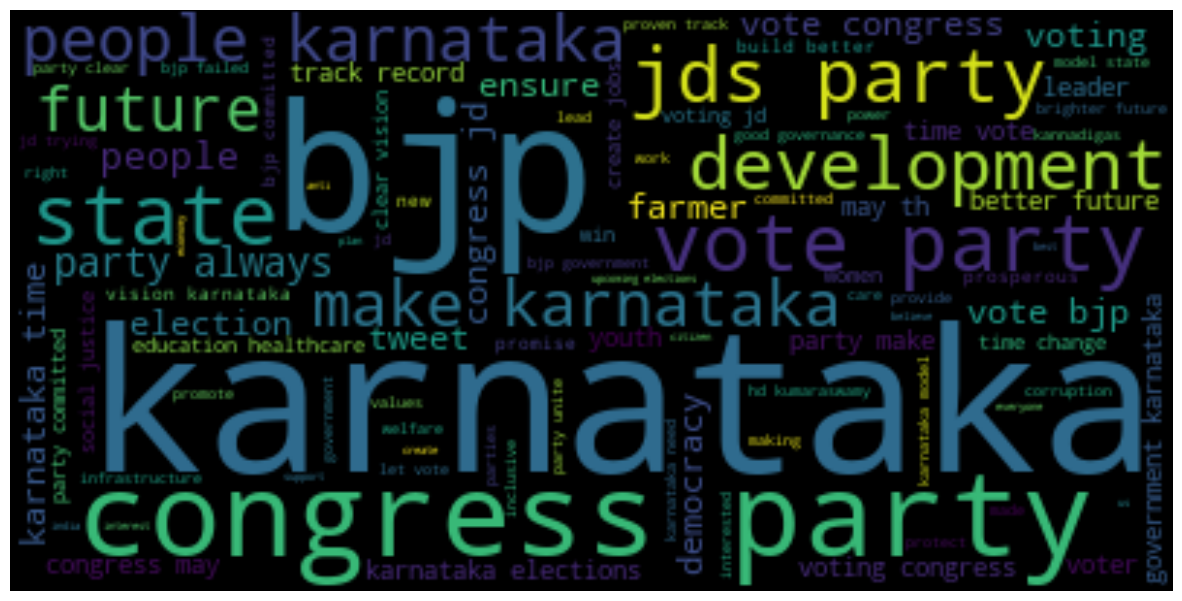

In [18]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
text = " ".join(i for i in data.cleaned_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
